<a href="https://colab.research.google.com/github/HW0327/Deep-Learning/blob/main/%20Neural%20Network%20for%20FashionMNIST%20Dataset%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Neural Network for FashionMNIST Dataset Classification

In [ ]:
import numpy as np
import torch
import torchvision


trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=True,download=True,transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=False,download=True,transform=torchvision.transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



In [ ]:
trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=64,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=False)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class LinearReg(torch.nn.Module):
  def __init__(self):
    super(LinearReg, self).__init__()
    # number of hidden nodes in each layer (512)
    hidden_1 = 256
    hidden_2 = 128
    hidden_3 = 64
    # linear layer (784 -> hidden_1)
    self.fc1 = nn.Linear(28*28, 256)
    # linear layer (n_hidden -> hidden_2)
    self.fc2 = nn.Linear(256,128)
    # linear layer (n_hidden -> 10)
    self.fc3 = nn.Linear(128,64)
    # linear layer (n_hidden -> 10)
    self.fc4 = nn.Linear(64,10)
    # dropout layer (p=0.2)
    # dropout prevents overfitting of data
    self.droput = nn.Dropout(0.2)

  def forward(self, x):
    x = x.view(-1,28*28)
    # add hidden layer, with relu activation function
    x = F.relu(self.fc1(x))
    # add dropout layer
    x = self.droput(x)
    # add hidden layer, with relu activation function
    x = F.relu(self.fc2(x))
    # add dropout layer
    x = self.droput(x)
    # add hidden layer, with relu activation function
    x = F.relu(self.fc3(x))
    # add dropout layer
    x = self.droput(x)
    # add output layer
    x = self.fc4(x)
    return x
    

net = LinearReg().cuda()
Loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

In [ ]:
train_loss_history = []
test_loss_history = []

for epoch in range(20):
  train_loss = 0.0
  test_loss = 0.0
  for i, data in enumerate(trainDataLoader):
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    optimizer.zero_grad()
    predicted_output = net(images)
    fit = Loss(predicted_output,labels)
    fit.backward()
    optimizer.step()
    train_loss += fit.item()
  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      images = images.cuda()
      labels = labels.cuda()
      predicted_output = net(images)
      fit = Loss(predicted_output,labels)
      test_loss += fit.item()
  train_loss = train_loss/len(trainDataLoader)
  test_loss = test_loss/len(testDataLoader)
  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)
  print('Epoch %s, Train loss %s, Test loss %s'%(epoch, train_loss, test_loss))

Epoch 0, Train loss 1.8944859647039156, Test loss 1.225646741450972
Epoch 1, Train loss 1.0353279292329287, Test loss 0.9292450638333704
Epoch 2, Train loss 0.8461941548629102, Test loss 0.7984402849795712
Epoch 3, Train loss 0.7412450964580467, Test loss 0.7267669141292572
Epoch 4, Train loss 0.67139891835291, Test loss 0.6732604106900039
Epoch 5, Train loss 0.6215915688827857, Test loss 0.6234085698416278
Epoch 6, Train loss 0.5820421769357185, Test loss 0.5953734105180024
Epoch 7, Train loss 0.5509002458439198, Test loss 0.5589607101716813
Epoch 8, Train loss 0.5250929050417598, Test loss 0.5416372021672072
Epoch 9, Train loss 0.5024109624945787, Test loss 0.518965200443936
Epoch 10, Train loss 0.4864820736621234, Test loss 0.5283887010471077
Epoch 11, Train loss 0.471077534515085, Test loss 0.49485092804690073
Epoch 12, Train loss 0.45687759338792705, Test loss 0.4901560582932393
Epoch 13, Train loss 0.4456004430013679, Test loss 0.47883457486416886
Epoch 14, Train loss 0.436478016

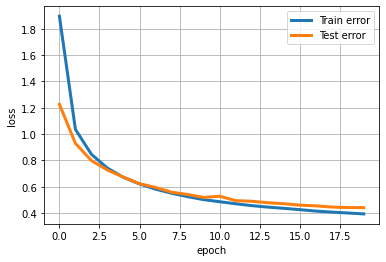

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(20),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(20),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

In [ ]:
from torchvision.transforms.functional import accimage
predicted_output = net(images)
print(torch.max(predicted_output, 1))
fit = Loss(predicted_output, labels)
print(labels)
print(fit)

torch.return_types.max(
values=tensor([ 8.2728,  0.7439,  9.1640, 13.4475, 10.3591, 10.0642, 16.0764,  2.8023,
         9.4546, 19.9553, 11.9612, 10.5088, 10.6957, 10.0551, 10.9883,  9.2764],
       device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([3, 0, 7, 5, 8, 4, 5, 2, 8, 9, 1, 9, 1, 8, 1, 5], device='cuda:0'))
tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5], device='cuda:0')
tensor(0.2399, device='cuda:0', grad_fn=<NllLossBackward0>)


In [ ]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
net.eval() # prep model for evaluation
for data, target in testDataLoader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = net(data.cuda())
    # calculate the loss
    loss = Loss(output, target.cuda())
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred).cuda()))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1
# calculate and print avg test loss
test_loss = test_loss/len(testDataLoader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))
for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))
print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.393348

Test Accuracy of     0: 82% (829/1000)
Test Accuracy of     1: 96% (961/1000)
Test Accuracy of     2: 82% (827/1000)
Test Accuracy of     3: 89% (896/1000)
Test Accuracy of     4: 71% (719/1000)
Test Accuracy of     5: 93% (930/1000)
Test Accuracy of     6: 56% (568/1000)
Test Accuracy of     7: 93% (939/1000)
Test Accuracy of     8: 95% (959/1000)
Test Accuracy of     9: 94% (947/1000)

Test Accuracy (Overall): 85% (8575/10000)


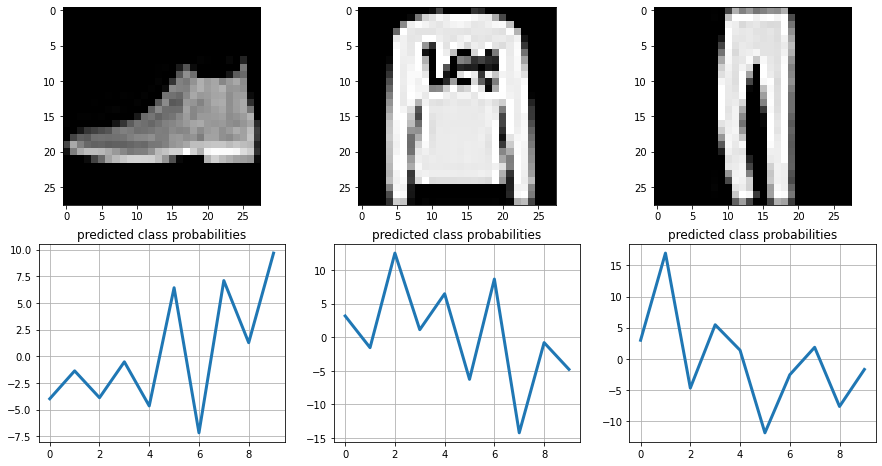

In [ ]:
images, labels = iter(testDataLoader).next()

plt.figure(figsize=(15,8))
# Plotting 3 image samples from the test dataset
for index in np.arange(0,3):
  plt.subplot(2,3,index+1)
  plt.imshow(images[index].cpu().squeeze().numpy(),cmap=plt.cm.gray)
  
# Visualize the predicted class probabilities for each sample
for index in np.arange(0,3):
  plt.subplot(2,3,index+4)
  sample_predicted_output = net(images[index].cuda())
  sample_predicted_output=sample_predicted_output.cpu().detach().numpy()
  plt.plot(range(10),sample_predicted_output[0],'-',linewidth=3)
  plt.title('predicted class probabilities')
  plt.grid(True)

From the sample graph above we can see that the first one is a shoe, and the model calculates the probabilities for each classes, and class 9 has the highest probability. So the model labels the image as class 9.

For the second image, we can that it is a T-shirt, and the model has the highest probability in class 2, so the second image is labeled as class 2.

The third image shows a pair of pants, and the model has the highest probability in class 1, so the third image is labeled as class 1.
